# Motion in 1D

'''{index}Motion in 1D

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import Function, Symbol, diff, dsolve, pprint, integrate
from matplotlib import animation, rc
from IPython.display import HTML

## Tutorial Problem 1.2

Vertical motion under gravity

In [79]:
def x(x0, v0, t, g=9.81):
    return x0 + v0*t - g*t**2/2 

time = np.arange(0, 40.8, 0.1)

x0 = 0 # initial position
v0 = 200 # initial velocity

position = x(x0, v0, time)
    
print("Max height reached = %.f m" % (max(position))) 
result = np.where(position == max(position))
print("Time needed for the body to reach that height = %.2fs" % (time[result[0][0]]))

Max height reached = 2039 m
Time needed for the body to reach that height = 20.40s


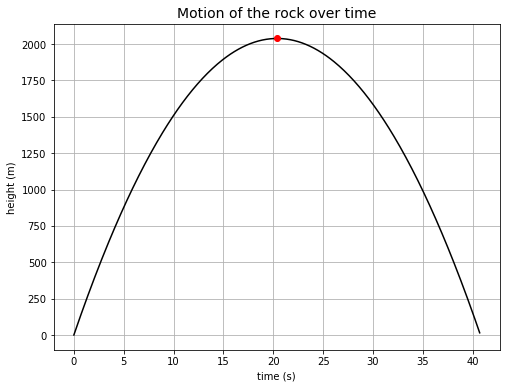

In [82]:
fig = plt.figure(figsize=(8,6))

plt.plot(time, position, 'k')
plt.plot(time[result[0][0]], max(position), 'ro')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.title('Motion of the rock over time', fontsize=14)
plt.grid(True)

plt.show()

## Tutorial Problem 1.3

Moving rocks in Death Valley California

In [74]:
m = 24 # mass (kg)
F = 5 # force of wind (N)
T = 5 # time wind exert force on rock (s)
u = 0.01 # coefficient of friction
g = 9.81 # m/s2

time1 = np.arange(0., 5.01, 0.01)

time2 = np.arange(0.01, 5.63, 0.01)

time = np.arange(0, 10.63, 0.01)

x = np.zeros(len(time))

v = np.zeros(len(time))

x[:501] = ((F-u*m*g)*time1**2)/(2*m)

v[:501] = (F-u*m*g)*time1/m

x[501:] = x[500] + (F-u*m*g)*T*time2/m - u*g*time2**2/2

v[501:] = v[500] - u*g*time2

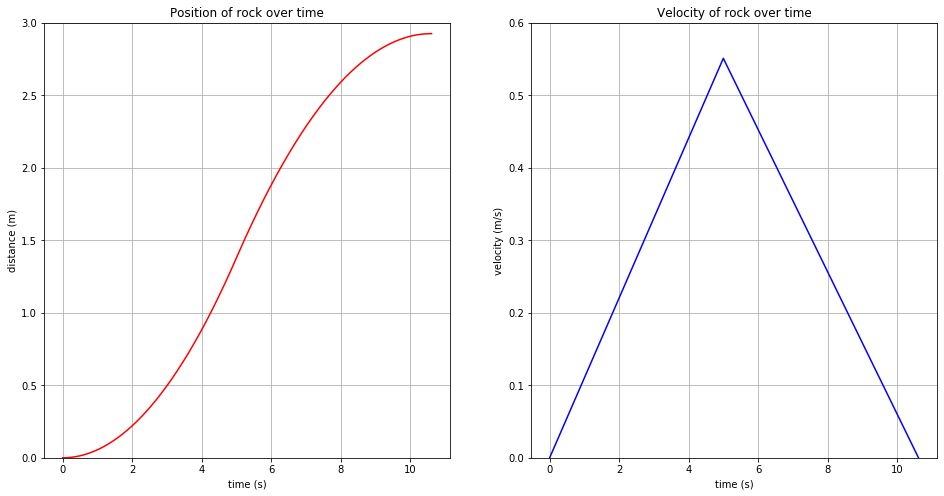

In [78]:
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121)
ax1.plot(time, x, 'r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('distance (m)')
ax1.set_ylim(0, 3)
ax1.set_title('Position of rock over time')
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(time, v, 'b')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_ylim(0, 0.6)
ax2.set_title('Velocity of rock over time')
ax2.grid(True)

plt.show()

## Tutorial Problem 1.4

Spherical sand grain sinking in water

## Tutorial Problem 1.5

Finding terminal velocity of sand grain sinking in water

In [85]:
def velocity(t, R, ps=2650, pw=1000, g=9.81, u=10e-3):
    return (2*(ps-pw)*g*R**2)/(9*u) * (1-np.exp((-9*u*t)/(2*ps*R**2))) # analytical solution

def t_v(radius, start, end, interval):
    t = np.arange(start, end, interval)
    v = np.zeros(len(t))
    for i in range(len(t)):
        v[i] = velocity(t[i], radius)
    return t, v # obtain velocity for grains with different radius over customised time intervals

t_1cm, v_1cm = t_v(1e-2, 0, 50, 0.05)
t_1mm, v_1mm = t_v(1e-3, 0, 0.5, 0.0005)
t_10um, v_10um = t_v(10e-6, 0, 1e-4, 1e-7)
t_1um, v_1um = t_v(1e-6, 0, 5e-7, 5e-10)

print("Terminal velocity of 1um grain is %.2e m/s" % (v_1um[-1]))
print("Terminal velocity of 10um grain is %.2e m/s" % (v_10um[-1]))
print("Terminal velocity of 1mm grain is %.2f m/s" % (v_1mm[-1]))
print("Terminal velocity of 1cm grain is %.2f m/s" % (v_1cm[-1]))

Terminal velocity of 1um grain is 3.60e-07 m/s
Terminal velocity of 10um grain is 3.60e-05 m/s
Terminal velocity of 1mm grain is 0.36 m/s
Terminal velocity of 1cm grain is 35.96 m/s


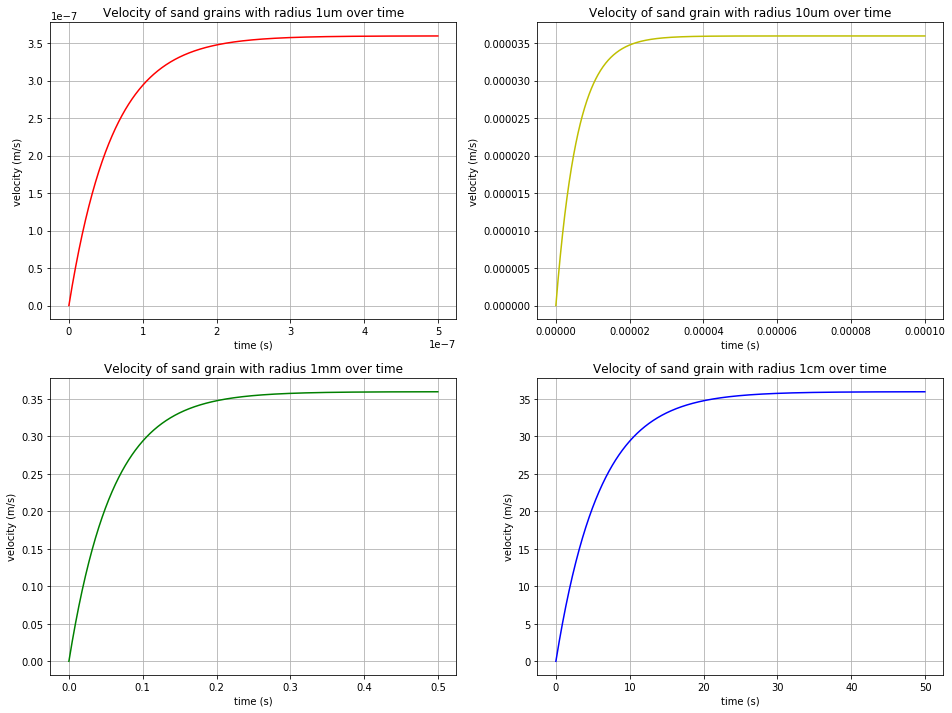

In [86]:
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax1.plot(t_1um, v_1um, 'r')
ax1.set_xlabel('time (s)')
ax1.set_ylabel('velocity (m/s)')
ax1.set_title('Velocity of sand grains with radius 1um over time')
ax1.grid(True)

ax2 = fig.add_subplot(222)
ax2.plot(t_10um, v_10um, 'y')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_title('Velocity of sand grain with radius 10um over time')
ax2.grid(True)

ax3 = fig.add_subplot(223)
ax3.plot(t_1mm, v_1mm, 'g')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('velocity (m/s)')
ax3.set_title('Velocity of sand grain with radius 1mm over time')
ax3.grid(True)

ax4 = fig.add_subplot(224)
ax4.plot(t_1cm, v_1cm, 'b')
ax4.set_xlabel('time (s)')
ax4.set_ylabel('velocity (m/s)')
ax4.set_title('Velocity of sand grain with radius 1cm over time')
ax4.grid(True)

plt.show()

## Tutorial Problem 1.6

Coupled oscillators

In [88]:
import cmath

w = np.pi

t = np.arange(0, 6.28, 0.01)
X1 = np.zeros(len(t))
X2 = np.zeros(len(t))
X3 = np.zeros(len(t))
X4 = np.zeros(len(t))

for i in range(len(t)):
    # A1 = A2
    z1 = cmath.exp(1j*w*t[i])+1
    X1[i] = z1.real
    z2 = cmath.exp(1j*w*t[i])-1
    X2[i] = z2.real
    # A1 = -A2
    z3 = cmath.exp(1j*w*t[i])+1
    X3[i] = z3.real
    z4 = -(cmath.exp(1j*w*t[i]))-1
    X4[i] = z4.real

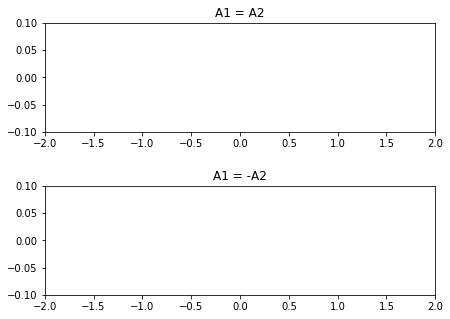

In [92]:
nframes = len(t)


# Plot background axes
fig, axes = plt.subplots(2,1, figsize=(7,5))


line1, = axes[0].plot([], [], 'ro', lw=2)
line2, = axes[0].plot([], [], 'go', lw=2)
line3, = axes[1].plot([], [], 'yo', lw=2)
line4, = axes[1].plot([], [], 'bo', lw=2)

for ax in axes:
    ax.set_xlim(-2,2)
    ax.set_ylim(-0.1,0.1)
    
axes[0].set_title('A1 = A2')
axes[1].set_title('A1 = -A2')
    

    
lines = [line1, line2, line3, line4]
    
plt.subplots_adjust(hspace=0.5)

# Plot background for each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Set what data to plot in each frame
def animate(i):
    
    x1 = X1[i]
    y1 = 0
    lines[0].set_data(x1, y1)
    
    x2 = X2[i]
    y2 = 0
    lines[1].set_data(x2, y2)
    
    x3 = X3[i]
    y3=0
    lines[2].set_data(x3, y3)
    
    x4 = X4[i]
    y4 = 0
    lines[3].set_data(x4, y4)
    
    return lines

# Call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nframes, interval=10, blit=True)

In [93]:
HTML(anim.to_html5_video())